# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

In [3]:
# Set monthly household income
monthly_income = 12000

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [6]:
# Fetch current BTC price
requests.get(btc_url)
response_btc_data = requests.get(btc_url)
btc_data = response_btc_data.json()
x = btc_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
requests.get(eth_url)
response_eth_data = requests.get(eth_url)
eth_data = response_eth_data.json()
y = eth_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * x
my_eth_value = my_eth * y

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $16507.00
The current value of your 5.3 ETH is $2148.94


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [9]:
# Format current date as ISO format
today = pd.Timestamp("2020-10-26", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Pick AGG and SPY close prices
df_closing_prices = pd.DataFrame()
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.64
Current SPY closing price: $339.415


In [10]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $16970.75
The current value of your 200 AGG shares is $23528.00


### Savings Health Analysis

In [11]:
# Set my current crypto wallet balance
my_crypto = {
    "balance": [my_btc_value, my_eth_value]
}

# Set my crypto symbols
crypto_symbol = ["BTC", "ETH"]

# Create a DataFrame with the current wallet balance
df_wallet_balance = pd.DataFrame(my_crypto, index=crypto_symbol)

my_crypto_value = df_wallet_balance['balance'].sum()



# Set the data for the shares value DataFrame
value_data = {
    "value": [my_spy_value, my_agg_value]
}

# Set my shares ticker symbols
share_symbol = ["SPY", "AGG"]

# Create a DataFrame with the current value of shares
df_value = pd.DataFrame(value_data, index=share_symbol)

my_shares_value = df_value['value'].sum()


# Set my current savings balance
my_savings = {
    "amount": [my_crypto_value, my_shares_value]
}

# Set my savings labels
labels = ["crypto", "shares"]

# Create a savings DataFrame
df_savings = pd.DataFrame(my_savings, index=labels)

# Display savings DataFrame
display(df_savings)

,amount
crypto,18655.934
shares,40498.750


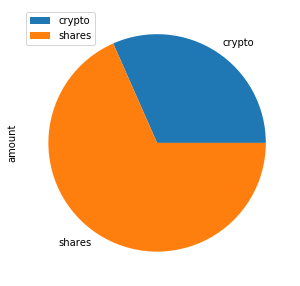

In [12]:
# Plot savings pie chart
df_savings = pd.DataFrame({'amount': [18721.616, 40498.750]},
                  index=['crypto', 'shares'])
plot = df_savings.plot.pie(y='amount', figsize=(5, 5))

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
Total = df_savings['amount'].sum()

# Validate savings health
if Total >= emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of thirty years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('1990-10-27', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-27', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_stock_data.head()

AGG                                        SPY  \
                             open    high     low   close     volume    open   
2008-01-02 00:00:00-05:00  101.36  102.61  101.06  101.65   699222.0  146.53   
2008-01-03 00:00:00-05:00  101.62  101.84  101.37  101.72   369816.0  144.92   
2008-01-04 00:00:00-05:00  101.81  102.37  101.81  102.12   496988.0  143.34   
2008-01-07 00:00:00-05:00  102.21  102.36  101.83  102.26   690542.0  141.81   
2008-01-08 00:00:00-05:00  102.16  102.52  101.94  102.51  1532957.0  142.10   

                                                              
                             high     low   close     volume  
2008-01-02 00:00:00-05:00  146.99  143.88  144.55  175801806  
2008-01-03 00:00:00-05:00  145.49  144.12  144.46  111357758  
2008-01-04 00:00:00-05:00  143.44  140.92  140.93  195945264  
2008-01-07 00:00:00-05:00  142.23  140.10  141.46  220398905  
2008-01-08 00:00:00-05:00  142.90  138.63  138.81  303249870

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                     \
                             open    high     low   close     volume   
2008-01-02 00:00:00-05:00  101.36  102.61  101.06  101.65   699222.0   
2008-01-03 00:00:00-05:00  101.62  101.84  101.37  101.72   369816.0   
2008-01-04 00:00:00-05:00  101.81  102.37  101.81  102.12   496988.0   
2008-01-07 00:00:00-05:00  102.21  102.36  101.83  102.26   690542.0   
2008-01-08 00:00:00-05:00  102.16  102.52  101.94  102.51  1532957.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2008-01-02 00:00:00-05:00          NaN  146.53  146.99  143.88  144.55   
2008-01-03 00:00:00-05:00     0.000689  144.92  145.49  144.12  144.46   
2008-01-04 00:00:00-05:00     0.003932  143.34  143.44  140.92  140.93   
2008-01-07 00:00:00-05:00     0.001371  141.81  142.23  140.10  141.46   
2008-01-08 00:00:00-05:00     0.002445  142.10  142.90  138.63  138.81   

                                                   
                              volume daily_return  
2008-01-02 00:00:00-05:00  175801806          NaN  
2008-01-03 00:00:00-05:00  111357758    -0.000623  
2008-01-04 00:00:00-05:00  195945264    -0.024436  
2008-01-07 00:00:00-05:00  220398905     0.003761  
2008-01-08 00:00:00-05:00  303249870    -0.018733

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008828,1.001732,0.996043,1.005279,1.002088,0.989992,0.982240,1.001034,0.989302,1.003544,...,0.996505,0.999952,1.001486,1.004069,0.994007,1.004174,0.988212,1.003784,0.999123,1.000662
2,1.010461,0.987981,1.001986,1.002214,1.010161,0.991908,0.983644,0.999084,0.997349,0.999103,...,0.998690,1.000703,1.005985,0.999061,0.986967,1.011025,0.988614,0.989722,0.990707,1.002120
3,1.017734,0.984771,1.000906,1.009375,1.008414,0.992334,0.980950,1.003794,1.004837,1.005946,...,0.995192,1.000208,1.004439,0.995547,0.972363,1.016059,0.987096,0.986178,0.998335,1.000559
4,1.016960,0.979149,1.007324,1.014722,1.009571,0.988747,0.981823,1.004262,1.008769,0.995137,...,0.990368,1.003523,0.990980,0.992932,0.972998,1.010771,0.982558,0.974654,0.996169,0.996055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.582659,2.067160,4.695040,2.162830,2.331842,1.353112,4.336884,3.223121,3.134874,2.055451,...,4.430398,1.660678,5.061102,1.950000,1.853745,2.881599,6.675930,3.116001,5.053233,3.056865
7557,4.610347,2.071627,4.685265,2.167281,2.318406,1.354966,4.296370,3.210136,3.120427,2.068546,...,4.436852,1.658014,5.040314,1.952931,1.850954,2.872116,6.723405,3.097889,5.040496,3.074894
7558,4.611701,2.070679,4.646721,2.157507,2.296837,1.338521,4.323335,3.207529,3.155663,2.068386,...,4.437857,1.655903,5.055641,1.951721,1.850034,2.889745,6.746157,3.091998,5.054459,3.075430
7559,4.640378,2.085857,4.630525,2.154822,2.298903,1.335493,4.323925,3.198386,3.170116,2.083617,...,4.434714,1.659016,5.080013,1.973901,1.862117,2.918819,6.723137,3.081313,5.089395,3.090401


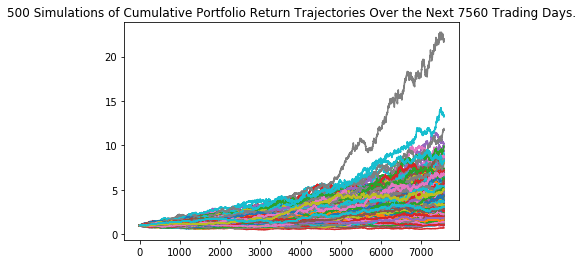

In [19]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

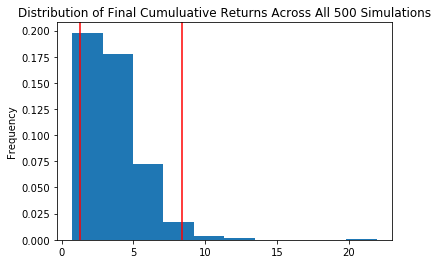

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              3.658956
std               2.030032
min               0.733860
25%               2.262778
50%               3.148920
75%               4.612692
max              21.952284
95% CI Lower      1.250133
95% CI Upper      8.398565
Name: 7560, dtype: float64


### Given an initial investment of $20,000, what is the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $25002.67 and $167971.31


### How would a 50% increase in the initial investment amount affect the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $37504.0 and $251956.96


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.portfolio_data.head()

AGG                                     \
                             open    high     low   close     volume   
2008-01-02 00:00:00-05:00  101.36  102.61  101.06  101.65   699222.0   
2008-01-03 00:00:00-05:00  101.62  101.84  101.37  101.72   369816.0   
2008-01-04 00:00:00-05:00  101.81  102.37  101.81  102.12   496988.0   
2008-01-07 00:00:00-05:00  102.21  102.36  101.83  102.26   690542.0   
2008-01-08 00:00:00-05:00  102.16  102.52  101.94  102.51  1532957.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2008-01-02 00:00:00-05:00          NaN  146.53  146.99  143.88  144.55   
2008-01-03 00:00:00-05:00     0.000689  144.92  145.49  144.12  144.46   
2008-01-04 00:00:00-05:00     0.003932  143.34  143.44  140.92  140.93   
2008-01-07 00:00:00-05:00     0.001371  141.81  142.23  140.10  141.46   
2008-01-08 00:00:00-05:00     0.002445  142.10  142.90  138.63  138.81   

                                                   
                              volume daily_return  
2008-01-02 00:00:00-05:00  175801806          NaN  
2008-01-03 00:00:00-05:00  111357758    -0.000623  
2008-01-04 00:00:00-05:00  195945264    -0.024436  
2008-01-07 00:00:00-05:00  220398905     0.003761  
2008-01-08 00:00:00-05:00  303249870    -0.018733

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

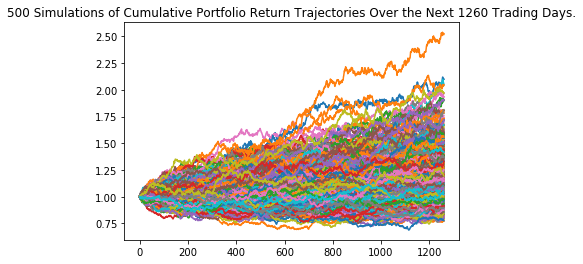

In [26]:
# Plot simulation outcomes
line_plot = MC_five_year.plot_simulation()

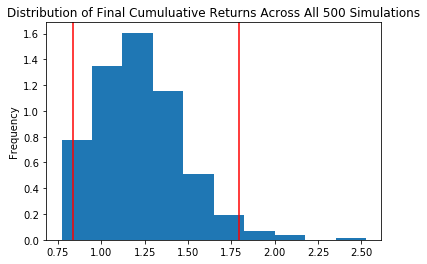

In [27]:
# Plot probability distribution and confidence intervals
dist_plot = MC_five_year.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.225554
std               0.250097
min               0.770734
25%               1.048667
50%               1.209142
75%               1.367425
max               2.526106
95% CI Lower      0.835328
95% CI Upper      1.795985
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*60000,2)
ci_upper_five = round(tbl[9]*60000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $75008.0 and $503913.93


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.portfolio_data.head()

AGG                                     \
                             open    high     low   close     volume   
2008-01-02 00:00:00-05:00  101.36  102.61  101.06  101.65   699222.0   
2008-01-03 00:00:00-05:00  101.62  101.84  101.37  101.72   369816.0   
2008-01-04 00:00:00-05:00  101.81  102.37  101.81  102.12   496988.0   
2008-01-07 00:00:00-05:00  102.21  102.36  101.83  102.26   690542.0   
2008-01-08 00:00:00-05:00  102.16  102.52  101.94  102.51  1532957.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2008-01-02 00:00:00-05:00          NaN  146.53  146.99  143.88  144.55   
2008-01-03 00:00:00-05:00     0.000689  144.92  145.49  144.12  144.46   
2008-01-04 00:00:00-05:00     0.003932  143.34  143.44  140.92  140.93   
2008-01-07 00:00:00-05:00     0.001371  141.81  142.23  140.10  141.46   
2008-01-08 00:00:00-05:00     0.002445  142.10  142.90  138.63  138.81   

                                                   
                              volume daily_return  
2008-01-02 00:00:00-05:00  175801806          NaN  
2008-01-03 00:00:00-05:00  111357758    -0.000623  
2008-01-04 00:00:00-05:00  195945264    -0.024436  
2008-01-07 00:00:00-05:00  220398905     0.003761  
2008-01-08 00:00:00-05:00  303249870    -0.018733

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

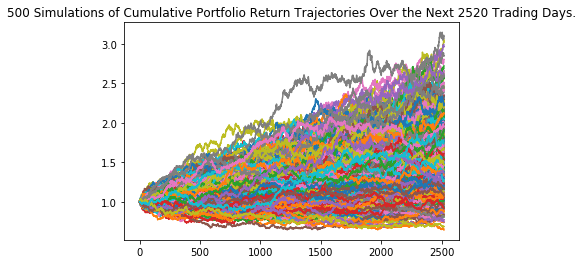

In [32]:
# Plot simulation outcomes
line_plot = MC_ten_year.plot_simulation()

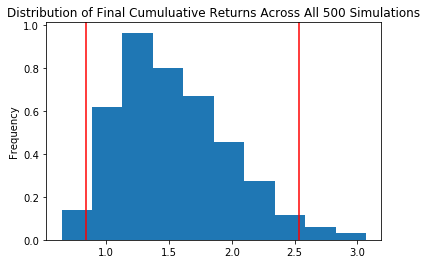

In [33]:
# Plot probability distribution and confidence intervals
dist_plot = MC_ten_year.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              1.535217
std               0.442596
min               0.643252
25%               1.202859
50%               1.466794
75%               1.804631
max               3.068824
95% CI Lower      0.838250
95% CI Upper      2.539037
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*60000,2)
ci_upper_ten = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $75008.0 and $503913.93
